In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
dfadult = pd.read_csv('/Users/jaseng/Documents/summer24_patina_project/patinaproject1/adult.csv')
dfadult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Cleaning

In [4]:
dfadult.shape
#dfadult.info

(32561, 15)

In [5]:
dfadult[dfadult == '?'] = np.nan

In [6]:
dfadult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    dfadult[col].fillna(dfadult[col].mode()[0], inplace=True)
    
dfadult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Defining that dataset

In [8]:
X = dfadult.drop(['income'], axis=1)

y = dfadult['income']

In [9]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [12]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [13]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Log regression and pca analysis

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8217


In [15]:
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
# explained variance ratio indicates the proportion of the dataset's variance that lies along the axis of each pc

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

The number of dimensions required to preserve 90% of variance is 12


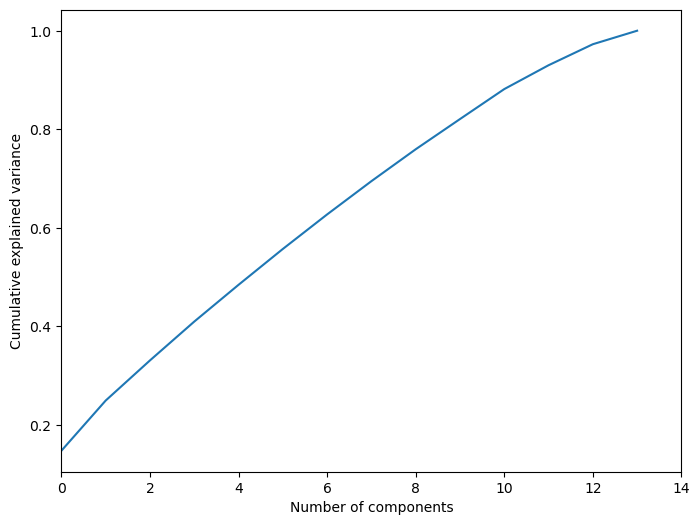

In [16]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)


plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [17]:
pca = PCA(n_components= 14)
pca = PCA(.90) 
# chooses minimum number of principal components such that x% of variance is retained
pca.fit(X_train)
pca.n_components_

12

In [18]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [19]:
# Get the indices of the selected components
selected_components = pca.components_

# Accumulate unique column names of selected components
selected_columns = set()
for component in selected_components:
    component_indices = component.argsort()[::-1][:1]  # Get the index of the most important feature
    component_names = list(X_train.columns[component_indices])
    selected_columns.update(component_names)

# Print the column names of the selected components as a list
print("Column names of selected components:")
print(list(selected_columns))

Column names of selected components:
['education', 'occupation', 'capital.gain', 'workclass', 'marital.status', 'relationship', 'age', 'sex', 'education.num', 'race', 'fnlwgt', 'capital.loss']


### Visualizations

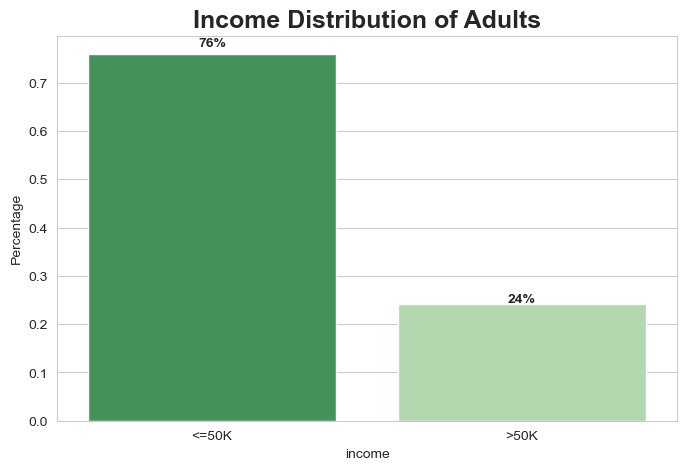

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = dfadult['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [21]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dfadult['age_group'] = dfadult['age'].apply(age_group)

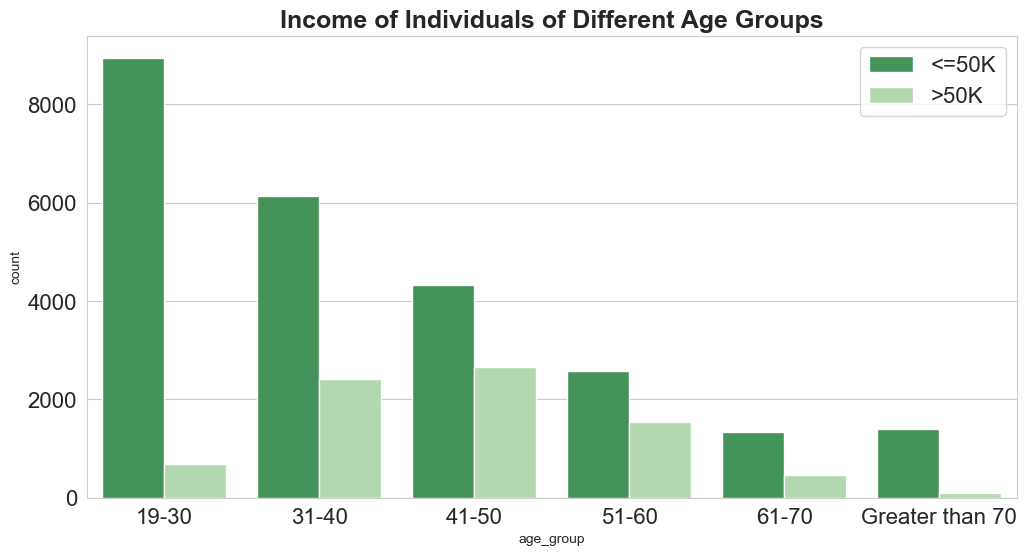

In [23]:
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='income', data=dfadult, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

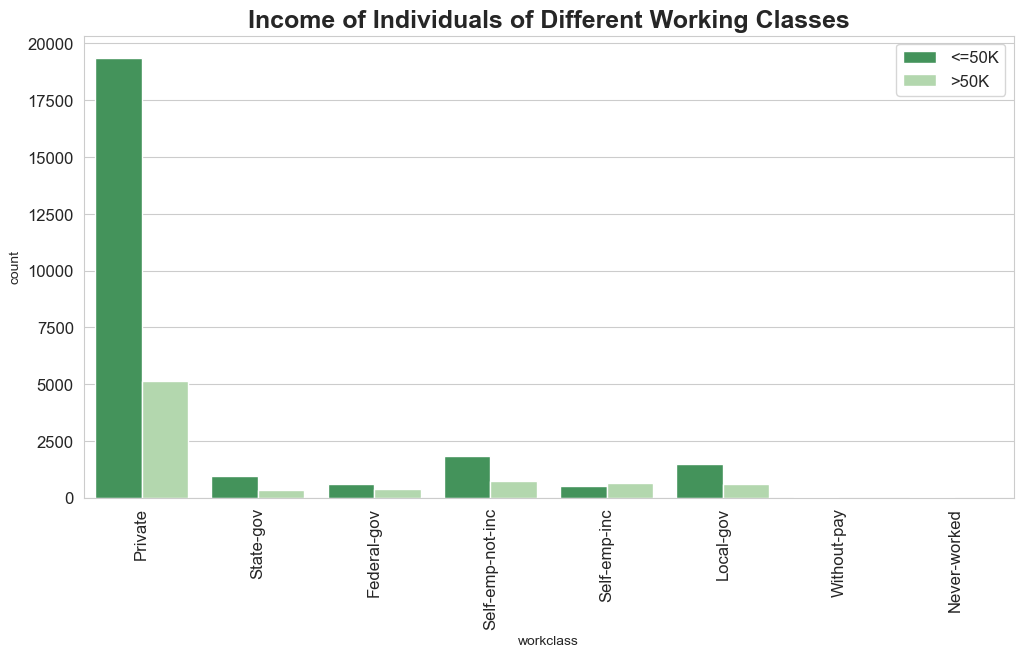

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

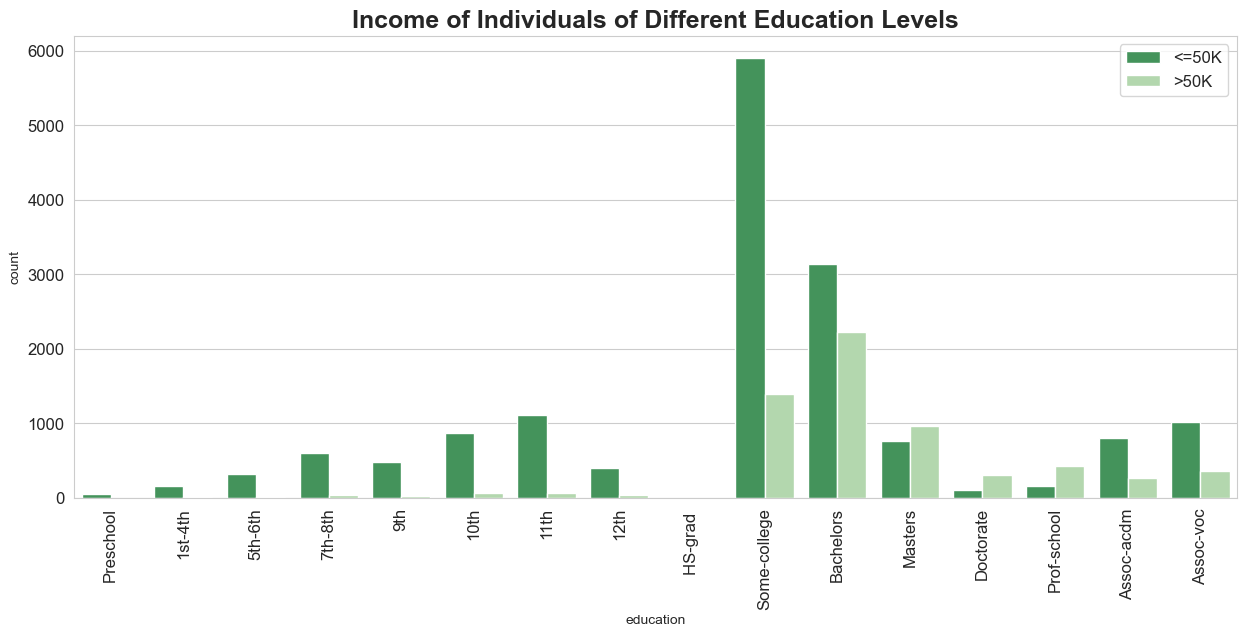

In [28]:
plt.figure(figsize=(15, 6))

order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
              'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']

sns.countplot(x='education', hue='income', data=dfadult, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

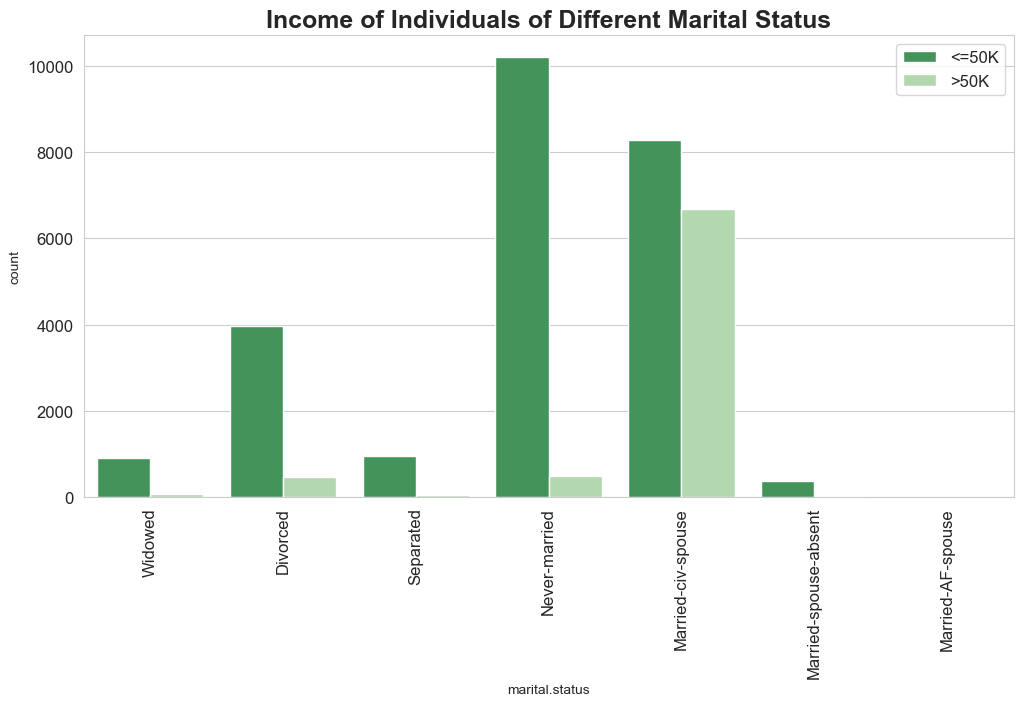

In [29]:
plt.figure(figsize=(12, 6))

sns.countplot(x='marital.status', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


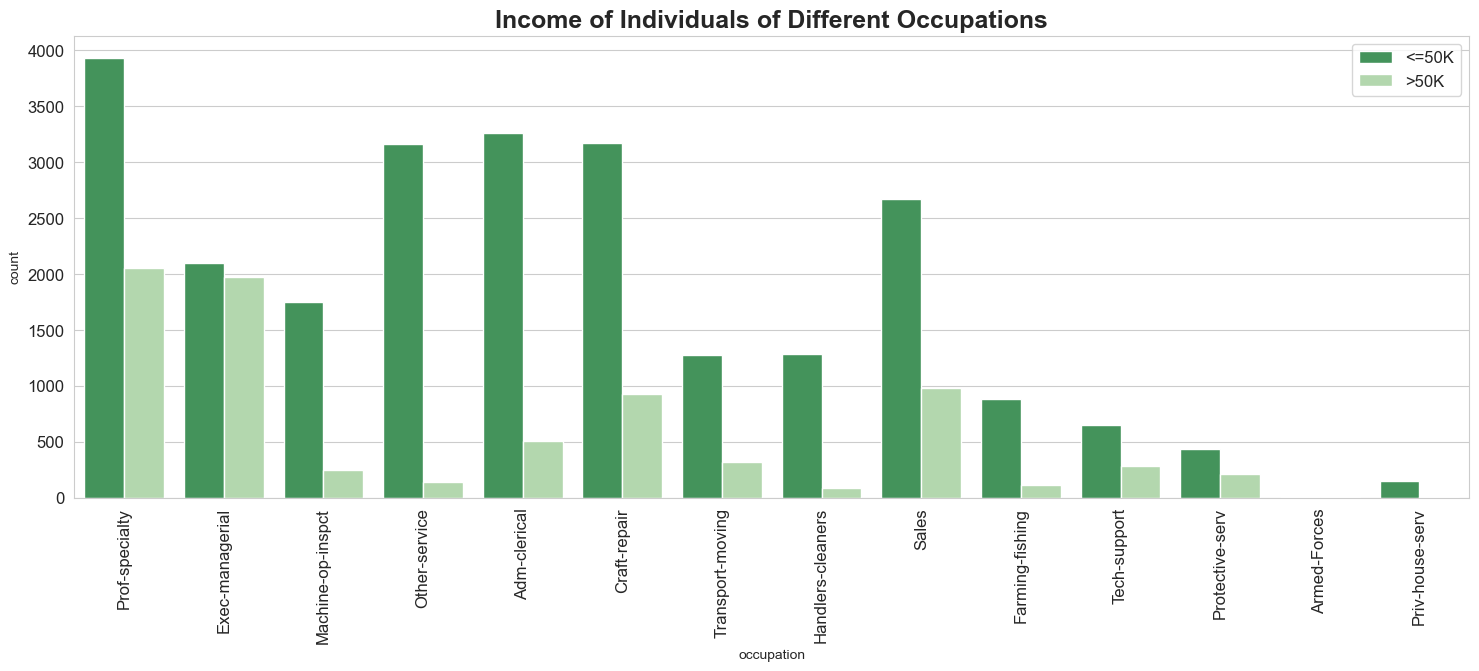

In [30]:
plt.figure(figsize=(18, 6))

sns.countplot(x='occupation', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


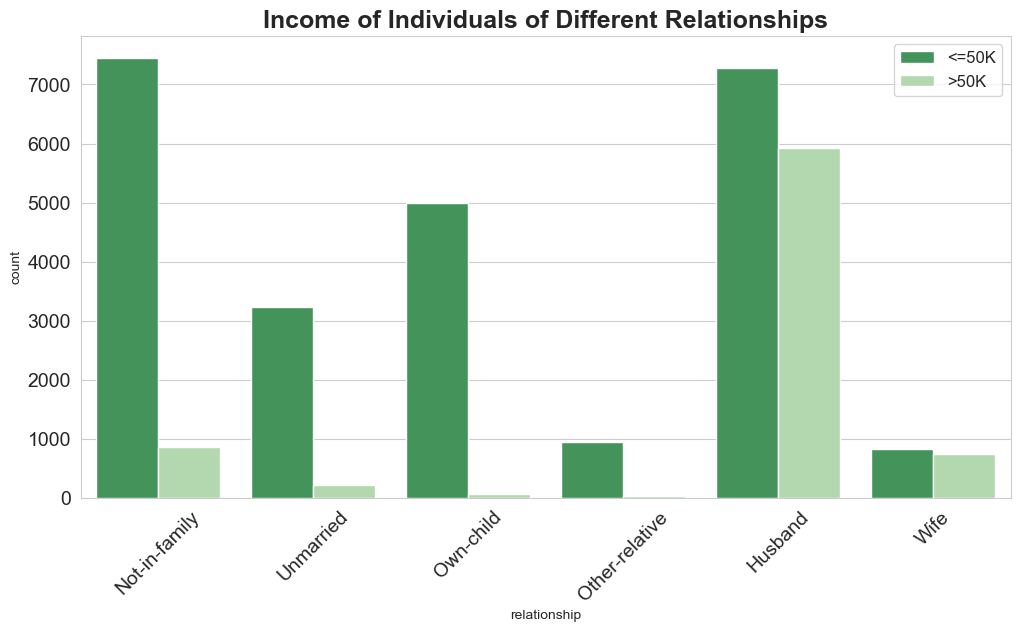

In [31]:
plt.figure(figsize=(12, 6))

sns.countplot(x='relationship', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Relationships', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.show()


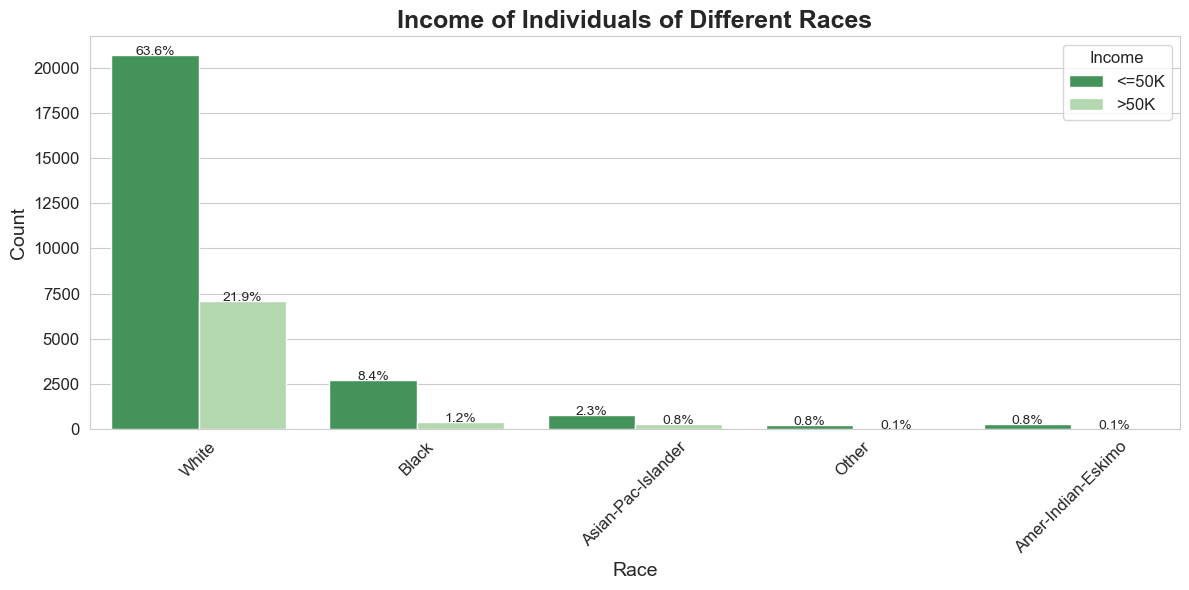

In [33]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(x='race', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Income', title_fontsize='large', fontsize='large')

# Calculate percentages
total = len(dfadult)  # Total number of records in the DataFrame
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Add a small vertical offset
            f'{height / total:.1%}',  # Calculate percentage and format
            ha='center', fontsize=10)

plt.tight_layout()  # Ensure all annotations are visible
plt.show()


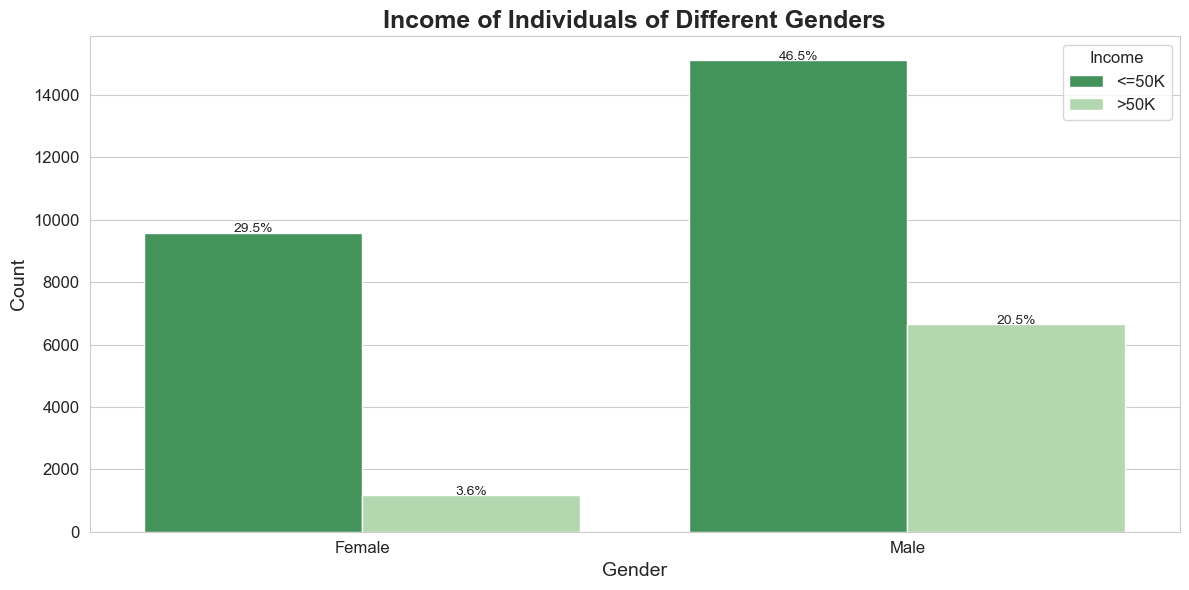

In [34]:
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(x='sex', hue='income', data=dfadult, palette='Greens_r')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Income', title_fontsize='large', fontsize='large')

# Calculate percentages
total = len(dfadult)  # Total number of records in the DataFrame
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Add a small vertical offset
            f'{height / total:.1%}',  # Calculate percentage and format
            ha='center', fontsize=10)

plt.tight_layout()  # Ensure all annotations are visible
plt.show()


In [38]:
dfadult['income']=dfadult['income'].map({'<=50K': 0, '>50K': 1})

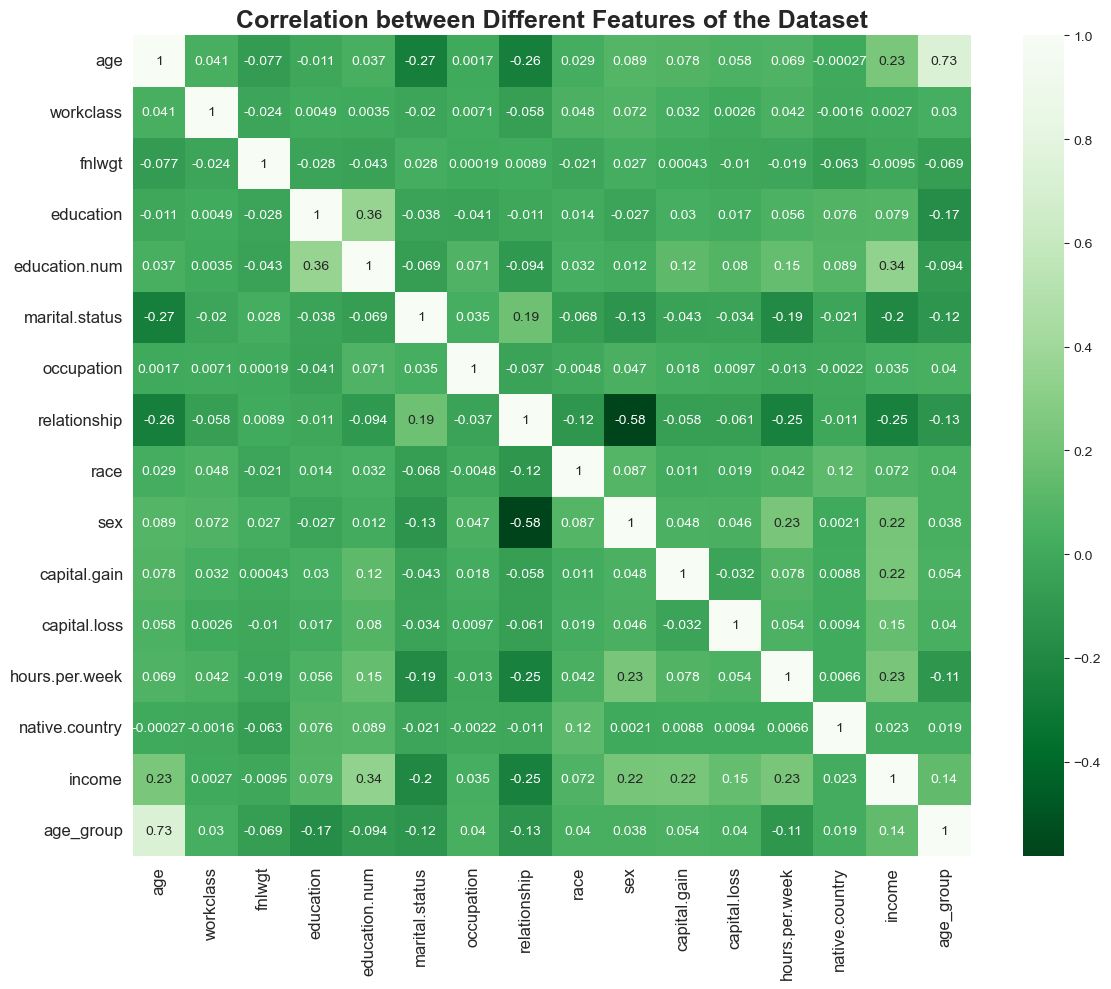

In [42]:
# Copying the DataFrame to preserve the original data
dfadult_encoded = dfadult.copy()

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
for col in dfadult_encoded.columns:
    if dfadult_encoded[col].dtype == 'object':
        dfadult_encoded[col] = label_encoder.fit_transform(dfadult_encoded[col])

# Compute the correlation matrix
corr = dfadult_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Greens_r', annot=True)

plt.title("Correlation between Different Features of the Dataset", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
